In [1]:
import os
print(os.getcwd())

/home/ssj0921/SSJ


In [65]:
os.chdir('/home/ssj0921/SSJ/Data/20191205_Heatmap_UT_sample2/')

In [3]:
from keras.models import load_model
model = load_model('/home/ssj0921/SSJ/Model/Model_Class_256_InceptionV3_E30_TCIA_20191101.h5')

Using TensorFlow backend.


In [111]:
jpg_path = '/home/ssj0921/SSJ/Data/20191205_Heatmap_UT_sample2/images_fake_B_1600_jpg'
jpg_list = []
for (path, dir, files) in os.walk(jpg_path):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.jpg':
            filePath = "{0}/{1}".format(path, filename)
            # print(filePath)
            jpg_list.append(filePath)

In [112]:
jpg_list.sort()

In [113]:
jpg_list[:3]

['/home/ssj0921/SSJ/Data/20191205_Heatmap_UT_sample2/images_fake_B_1600_jpg/sample_1TCGA-BK-A139-01C-08-BS8.A52ED78B-2752-43D5-A185-C329B9B38B74_2_00000_fake_B.jpg',
 '/home/ssj0921/SSJ/Data/20191205_Heatmap_UT_sample2/images_fake_B_1600_jpg/sample_1TCGA-BK-A139-01C-08-BS8.A52ED78B-2752-43D5-A185-C329B9B38B74_2_00001_fake_B.jpg',
 '/home/ssj0921/SSJ/Data/20191205_Heatmap_UT_sample2/images_fake_B_1600_jpg/sample_1TCGA-BK-A139-01C-08-BS8.A52ED78B-2752-43D5-A185-C329B9B38B74_2_00002_fake_B.jpg']

In [109]:
jpg_list[0].split('/')[7][:-4] + '.jpg'

'sample_1TCGA-BK-A139-01C-08-BS8.A52ED78B-2752-43D5-A185-C329B9B38B74_2_00000_fake_B.jpg'

In [110]:
from PIL import Image

for i in range(len(jpg_list)):
    filename = jpg_list[i]
    im = Image.open(filename)
    rgb_im = im.convert('RGB')
    save_name = jpg_list[i].split('/')[7][:-4] + '.jpg'
    rgb_im.save('./images_fake_B_1600_jpg/' + save_name)

In [114]:
from matplotlib.image import imread

im_list = []

for filename in jpg_list:
    img = imread(filename)
    im_list.append(img)

In [115]:
len(im_list)

1600

In [116]:
im_list[1].shape[0:]

(256, 256, 3)

In [117]:
import numpy as np

x = np.array(im_list)

from PIL import Image

# Resize Image
hmap_img = []
for n, img in enumerate(x):
    arr = Image.fromarray(img)
    res = arr.resize((299, 299))
    hmap_img.append(np.array(res))
    
hmap_img = np.array(hmap_img)

In [118]:
len(hmap_img)

1600

In [119]:
hmap_img = hmap_img / 255 # 정규화

In [120]:
pre = model.predict(hmap_img)

In [121]:
import pandas as pd

In [122]:
# 두번째 컬럼 값만 가져오기
new_img = []

for predict in pre:
    new_img.append(predict)

In [123]:
len(new_img)

1600

In [124]:
# 가져온 두번째 컬럼 값을 array로 만들기
hmap_arr = np.array(new_img)

In [125]:
len(hmap_arr)

1600

In [126]:
hmap_mat = np.resize(hmap_arr, (40, 40))

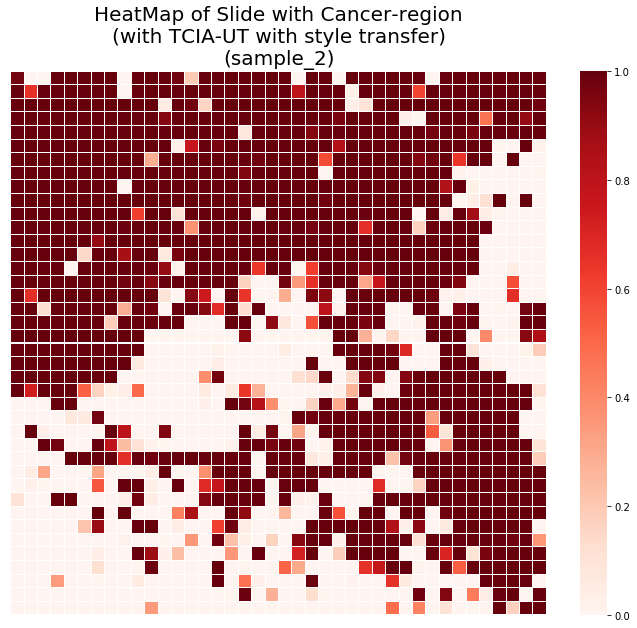

In [127]:
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(hmap_mat, 
            cmap=sns.color_palette("Reds", 255), # coolwarm, RdYlGn_r, Reds, Blues
            #annot=True, # fmt='f',
            xticklabels='', yticklabels='', linewidths=0.01, linecolor='white')
plt.title('HeatMap of Slide with Cancer-region\n(with TCIA-UT with style transfer)\n(sample_2)',
          fontsize=20)
plt.show()

In [52]:
#fig = plt.gcf()
#plt.savefig('./heatmap_Cancer_20191204_AUMC.jpg')

<Figure size 432x288 with 0 Axes>

([array([ 2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., 36.]),
  array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 28.]),
  array([13.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0., 25.]),
  array([ 7.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 32.]),
  array([ 6.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1., 30.]),
  array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 30.]),
  array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 37.]),
  array([ 6.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 32.]),
  array([ 6.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0., 31.]),
  array([ 6.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0., 30.]),
  array([ 9.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 28.]),
  array([ 8.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  1., 28.]),
  array([10.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1., 26.]),
  array([15.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  2., 21.]),
  array([17.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1., 19.]),
  array([11.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 26.]),
  array([13.,  0.,  2., 

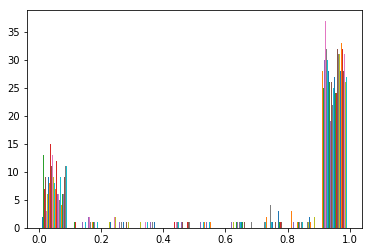

In [35]:
plt.hist(hmap_mat)